# Exercise 3

Let's explore various field and particle configurations

In [1]:
import numpy as np
from scipy.constants import c,e,m_e
%matplotlib notebook # use '%matplotlib inline' in Google Colab
import matplotlib.pyplot as plt

## Code units

We use dimensionless units depending on an arbitrary frequency $\omega$ that for simplicity we set at 1 Hz. These are the adopted normalizations:

$$ m \rightarrow \dfrac{m}{m_e}  \quad q \rightarrow \dfrac{q}{e} \quad v \rightarrow \dfrac{v}{c} \quad t \rightarrow t\omega $$
$$ x \rightarrow \dfrac{x}{c/\omega} \quad E \rightarrow \dfrac{E}{m_e c\omega/e} \quad B \rightarrow \dfrac{B}{m_e \omega/e} $$

where:

In [2]:
print("m_e=%s kg \n e=%s C \n c=%s m/s" %(m_e,e,c))

m_e=9.1093837015e-31 kg 
 e=1.602176634e-19 C 
 c=299792458.0 m/s


## Boris Pusher

In [3]:
# function performing the Boris algorithm

def Boris_pusher(q,m,pos0,v0,T,dt,E,B,relativity=True):
    
    # position initialization
    x=pos0[0]
    y=pos0[1]
    z=pos0[2]
    
    # velocity initialization
    vx=v0[0]
    vy=v0[1]
    vz=v0[2]
    
    # definition of timesteps
    timesteps=np.arange(0,int(T/dt)+1)
    
    #definition of times
    times=timesteps*dt

    # variables where to store quantities to save
    xsave=[x]
    ysave=[y]
    zsave=[z]
    vxsave=[vx]
    vysave=[vy]
    vzsave=[vz]
    Exsave=[]
    Eysave=[]
    Ezsave=[]
    Bxsave=[]
    Bysave=[]
    Bzsave=[]
    
    # a useful constant
    const=q*dt/(2*m)
    
    # start iterating over timesteps
    for timestep in timesteps:
        
        # get fields at particle position
        Bp=B(x,y,z,times[timestep])
        Ep=E(x,y,z,times[timestep])
        
        # store fields
        Exsave.append(Ep[0])
        Eysave.append(Ep[1])
        Ezsave.append(Ep[2])
        Bxsave.append(Bp[0])
        Bysave.append(Bp[1])
        Bzsave.append(Bp[2])
        
        v2=vx**2+vy**2+vz**2 # squared velocity at step (n-1/2)
        
        # check if relativistic description is required
        if relativity:
            gamma=1/np.sqrt(1-v2) # Lorentz factor at step (n-1/2)
        else:
            gamma=1
            
        # momentum components u=v*gamma  at step (n-1/2)
        ux=vx*gamma
        uy=vy*gamma
        uz=vz*gamma
        
        # u^- components
        u_x=ux+const*Ep[0]
        u_y=uy+const*Ep[1]
        u_z=uz+const*Ep[2]
        
        # check if relativistic description is required
        if relativity:
            gamma_=np.sqrt(1+u_x**2+u_y**2+u_z**2) # approximated Lorentz factor at step (n)
        else:      
            gamma_=1
        
        # b components
        bx=const*Bp[0]/gamma_
        by=const*Bp[1]/gamma_
        bz=const*Bp[2]/gamma_
        
        b2=bx**2+by**2+bz**2 #b^2
        
        u_timesb=u_x*bx+u_y*by+u_z*bz # u^- x b
        
        # momentum components at step (n)
        ux_n=(u_x+u_y*bz-u_z*by+bx*u_timesb)/(1+b2)
        uy_n=(u_y+u_z*bx-u_x*bz+by*u_timesb)/(1+b2)
        uz_n=(u_z+u_x*by-u_y*bx+bz*u_timesb)/(1+b2)
        
        # velocity components at step (n)
        vx_n=ux_n/gamma_
        vy_n=uy_n/gamma_
        vz_n=uz_n/gamma_
        
        # Lorentz force at step (n)
        Fx=q*(Ep[0]+vy_n*Bp[2]-vz_n*Bp[1])
        Fy=q*(Ep[1]+vz_n*Bp[0]-vx_n*Bp[2])
        Fz=q*(Ep[2]+vx_n*Bp[1]-vy_n*Bp[0])
        
        # momentum components at step (n+1/2)
        ux=ux+Fx*dt/m
        uy=uy+Fy*dt/m
        uz=uz+Fz*dt/m
        
        if relativity:
            gamma=np.sqrt(1+ux**2+uy**2+uz**2) # Lorentz factor at step (n+1/2)
        else:      
            gamma=1
            
        # velocity components at step (n+1/2)
        vx=ux/gamma
        vy=uy/gamma
        vz=uz/gamma
        
        # save the updated velocities
        vxsave.append(vx)
        vysave.append(vy)
        vzsave.append(vz)
        
        # position components at step (n+1)
        x=x+vx*dt
        y=y+vy*dt
        z=z+vz*dt
        
        # save the updated positions
        xsave.append(x)
        ysave.append(y)
        zsave.append(z)
        
    return xsave[:-1],ysave[:-1],zsave[:-1],vxsave[:-1],vysave[:-1],vzsave[:-1],Exsave,Eysave,Ezsave,Bxsave,Bysave,Bzsave,times 

## Parameters

In [4]:
# parameters to define

omega=1 # reference frequency
q=-1 # particle charge
m=1 # particle mass

pos0=np.array([0,0,0]) # initial position
v0=np.array([0,0,0]) # initial velocity

T=200/omega # simulation duration 
dt=(1/omega)/100 # simulation timestep

# magnetic field
def B(x,y,z,t):
    Bx=0 
    By=0
    Bz=0
    return [Bx,By,Bz]
    
# electric field
def E(x,y,z,t):
    Ex=0
    Ey=0
    Ez=0
    return [Ex,Ey,Ez]  

## Run

In [5]:
# apply the Boris pusher
x,y,z,vx,vy,vz,Ex,Ey,Ez,Bx,By,Bz,t = Boris_pusher(q,m,pos0,v0,T,dt,E,B,relativity=False)

## Plots

<IPython.core.display.Javascript object>


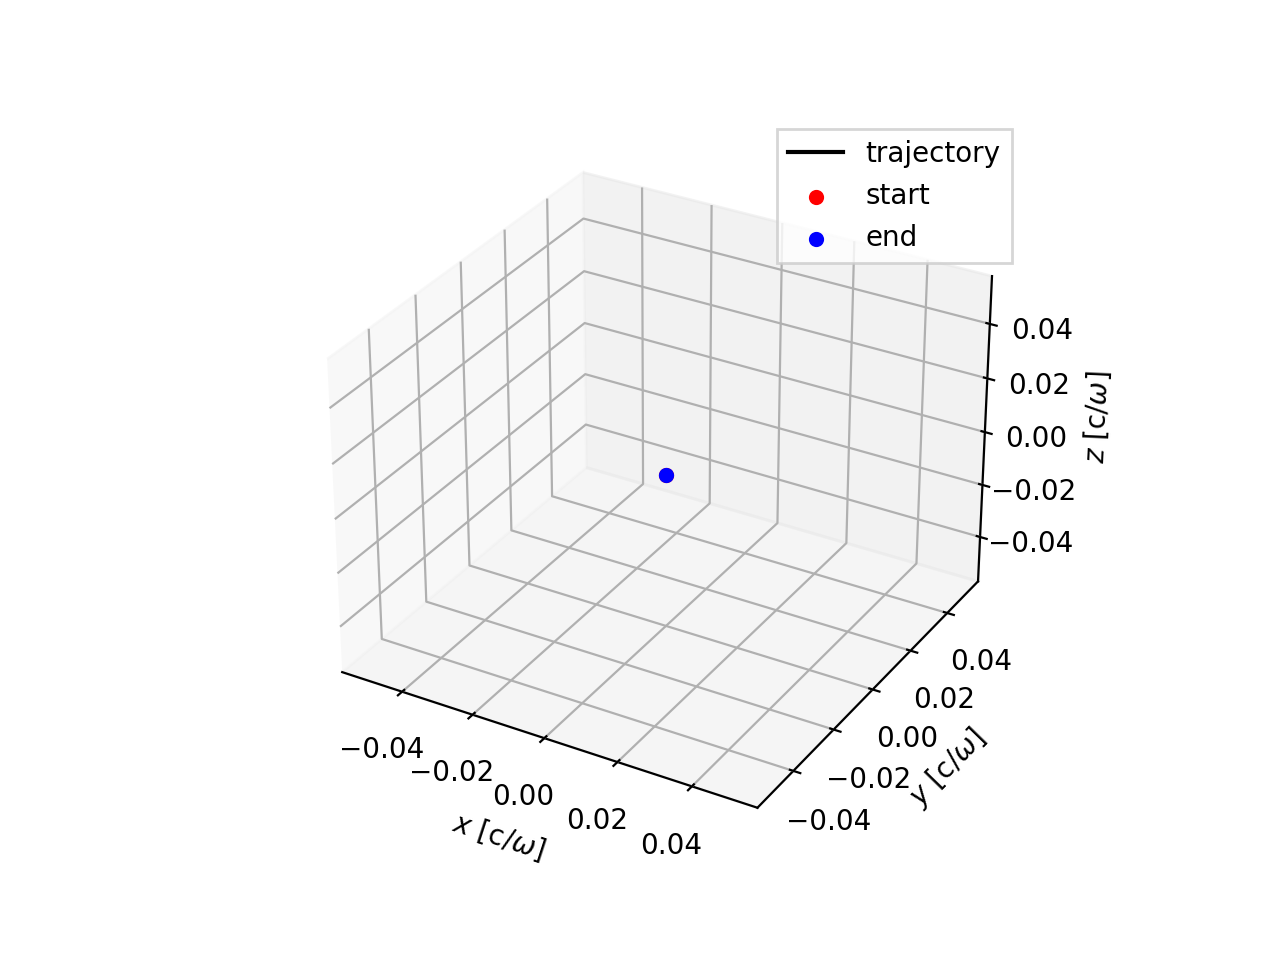

In [6]:
# plot trajectory in space

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x,y,z,color='black',label='trajectory')
ax.scatter(x[0],y[0],z[0],color='red',label='start')
ax.scatter(x[-1],y[-1],z[-1],color='blue',label='end')
ax.set_xlabel('$x$ [c/$\omega$]')
ax.set_ylabel('$y$ [c/$\omega$]')
ax.set_zlabel('$z$ [c/$\omega$]')
#ax.set_ylim([0,10])
#ax.set_zlim([-5,5])
plt.legend(loc='upper right',fancybox=False)
plt.show()

<IPython.core.display.Javascript object>


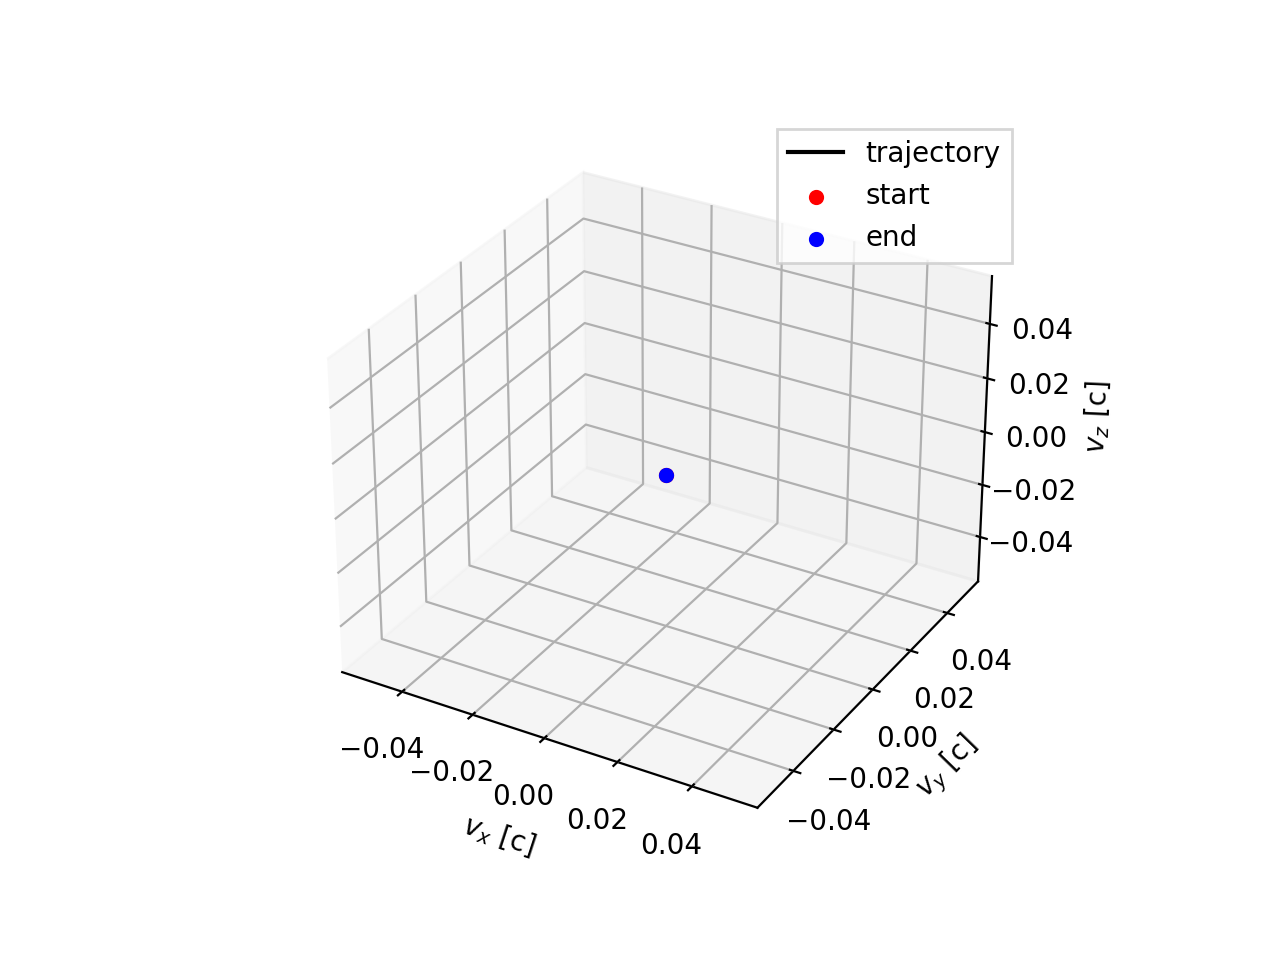

In [7]:
# plot trajectory in velocity space

ax = plt.figure().add_subplot(projection='3d')
ax.plot(vx,vy,vz,color='black',label='trajectory')
ax.scatter(vx[0],vy[0],vz[0],color='red',label='start')
ax.scatter(vx[-1],vy[-1],vz[-1],color='blue',label='end')
ax.set_xlabel('$v_x$ [c]')
ax.set_ylabel('$v_y$ [c]')
ax.set_zlabel('$v_z$ [c]')
plt.legend(loc='upper right',fancybox=False)
plt.show()

<IPython.core.display.Javascript object>


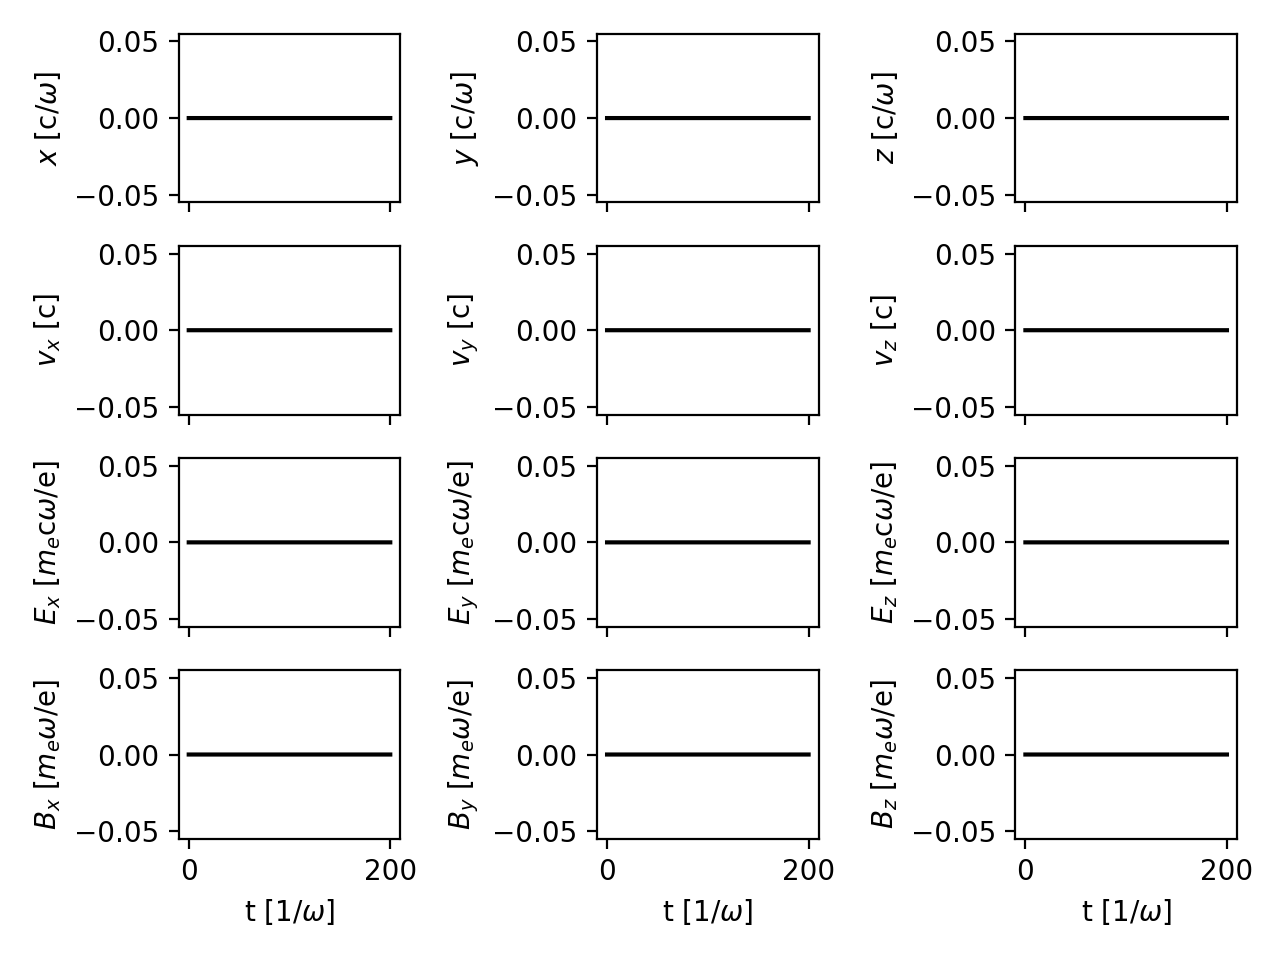

In [8]:
# plot all quantities in function of time

fig, ax = plt.subplots(4,3, sharex=True)
ax[0,0].plot(t,x,color='black')
ax[0,1].plot(t,y,color='black')
ax[0,2].plot(t,z,color='black')
ax[1,0].plot(t,vx,color='black')
ax[1,1].plot(t,vy,color='black')
ax[1,2].plot(t,vz,color='black')
ax[2,0].plot(t,Ex,color='black')
ax[2,1].plot(t,Ey,color='black')
ax[2,2].plot(t,Ez,color='black')
ax[3,0].plot(t,Bx,color='black')
ax[3,1].plot(t,By,color='black')
ax[3,2].plot(t,Bz,color='black')
ax[0,0].set_ylabel('$x$ [c/$\omega$]')
ax[0,1].set_ylabel('$y$ [c/$\omega$]')
ax[0,2].set_ylabel('$z$ [c/$\omega$]')
ax[1,0].set_ylabel('$v_x$ [c]')
ax[1,1].set_ylabel('$v_y$ [c]')
ax[1,2].set_ylabel('$v_z$ [c]')
ax[2,0].set_ylabel('$E_x$ [$m_e$c$\omega$/e]')
ax[2,1].set_ylabel('$E_y$ [$m_e$c$\omega$/e]')
ax[2,2].set_ylabel('$E_z$ [$m_e$c$\omega$/e]')
ax[3,0].set_ylabel('$B_x$ [$m_e\omega$/e]')
ax[3,1].set_ylabel('$B_y$ [$m_e\omega$/e]')
ax[3,2].set_ylabel('$B_z$ [$m_e\omega$/e]')
ax[3,0].set_xlabel('t [1/$\omega$]')
ax[3,1].set_xlabel('t [1/$\omega$]')
ax[3,2].set_xlabel('t [1/$\omega$]')
plt.tight_layout()
plt.show()

## Your turn

Copy and paste below the last five boxes of code and study the trajectories in the following cases. For each case, the parameters to be modified are listed. Fields and velocities not specified are zero.

* uniform and constant fields:
    * case 1: $Bz=0.1
    * case 2: $Bz=0.1$, $v_z=0.1$
    * case 3: $Bz=0.1$, $v_x=0.1$
    * case 4: $Bz=0.1$, $v_x=0.1$, $v_z=0.1$  try to change the sign of the charge
    * case 5: $Bz=0.1$, $E_y=0.01$, $v_x=0.1$, $v_z=0.1$ try to change the sign of the charge
    * case 6: $E_y=0.01$ try to switch to True the relativity flag
    * case 7: $Bz=0.1$, $E_y=0.01$, $v_z=0.1$ try to switch to True the relativity flag
    * case 8: $Bz=0.1$, $E_y=10$, $v_z=0.1$ try to switch to True the relativity flag
    * case 9: $Bz=0.1$, $E_y=0.01$, $v_z=0.2$ try to consider both electrons and protons
    * case 10: $Bz=0.1$, $E_y=0.01$, $v_z=0.5$ try to consider both electrons and protons
    * case 11: $By=0.1$, $E_y=0.01$, $v_x=0.1$
    
* non uniform fields:
    * case 12: $T=2000/omega$, $B_x=0.01*np.cos(0.1*x)+0.2$, $v_0=(0.1,0,0.1)$
    * case 13: $B_z=E_y=0.1*np.cos(0.3*(x-t))$, $v_0=(0,0,0)$

Try to comment on what you see, we will discuss these cases during the class. Play with the code as much as you want!